<텍스트 분석의 종류>
- 1)텍스트 분류(Text Classification): 문서가 '어떤 특정 분류(카테고리)'에 속하는지를 분류하는 것. ->지도학습
- 2)감성 분석(Sentiment Analysis): 텍스트에서 나타나는 '주관적인 요소'를 분석하는 기법. 긍/부정 리뷰, 소셜 미디어 감정분석 등. ->지도학습, 비지도학습
- 3)텍스트 요약(Summarziation): 텍스트 내 중요한 주제나 중심 사상을 추출. 가장 대표적인 것이 '토픽 모델링' ->비지도학습
- 4)텍스트 군집화(Clustering) & 유사도 측정: 비슷한 유형의 문서에 대해 군집화 수행. 문서들 간 유사도를 측정해 비슷한 문서끼리 모으는 방법. ->비지도학습(텍스트 분류의 비지도학습화)

<텍스트 분석의 순서>
- 1)텍스트 전처리- 사전에 클렌징, 대소문자 변경, 특수문자 삭제, 토큰화, 스탑워즈 제거, 어근 추출 등의 텍스트 정규화 작업
- 2)피처 벡터화/추출 - 앞에서 가공된 전처리된 데이터에서 피처를 추출하고 벡터 값을 할당하는 방식. BOW와 Word2Vec 방법을 활용, 여기선 BOW 활용.
- 3)텍스트 분석 - ML 모델 생성 + 학습/예측/평가
- (1,2번을 완수하면 정형 데이터로 바뀌어 ML을 돌릴 수 있음)

## 3. 텍스트 분석 실습
### 3-3. 텍스트 요약 - 토픽 모델링(비지도학습)
- 숨겨진 주제를 효과적으로 표현할 수 있는 "중심 단어"를 함축적으로 추출함.
- 하지만 추출된 중심단어를 기반으로 내용을 유추해야 하므로 성능은 그렇게 좋지 않음..ㅜㅜ

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#카테고리 8개만 추출한 'news_df'
cats = ['rec.motorcycles','rec.sport.baseball','comp.graphics','comp.windows.x','talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']
news_df = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'),
                                                        categories=cats, random_state=0)


In [3]:
print(type(news_df))

<class 'sklearn.utils.Bunch'>


In [5]:
news_df.keys() #->여기서의 data를 사용할 예정

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [10]:
len(news_df.data) #list라 len만 사용가능

7862

In [8]:
#카운트 기반 벡터화
#객체-파라미터도 설정
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
#학습,적용
ftr_vect = count_vect.fit_transform(news_df.data) #만들어진 벡터, "숫자값"
print(ftr_vect.shape)

(7862, 1000)


In [14]:
##주의!! 카운트 벡터화 하면 숫자값을 갖게 됨. 그래서 "객체.get_feature_names()"를 하면 다시 원래 단어를 출력함.
count_vect.get_feature_names()

['00',
 '000',
 '01',
 '02',
 '03',
 '04',
 '05',
 '10',
 '100',
 '11',
 '12',
 '128',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1990',
 '1991',
 '1992',
 '1993',
 '20',
 '200',
 '21',
 '22',
 '23',
 '24',
 '24 bit',
 '25',
 '256',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '31',
 '32',
 '35',
 '3d',
 '40',
 '44',
 '50',
 '500',
 '60',
 '80',
 '800',
 '90',
 '91',
 '92',
 '93',
 'ability',
 'able',
 'ac',
 'accept',
 'accepted',
 'access',
 'according',
 'act',
 'action',
 'actions',
 'acts',
 'actually',
 'add',
 'added',
 'addition',
 'address',
 'adl',
 'advance',
 'age',
 'ago',
 'agree',
 'aids',
 'al',
 'allow',
 'american',
 'amiga',
 'analysis',
 'anonymous',
 'anonymous ftp',
 'answer',
 'answers',
 'anti',
 'anybody',
 'apartment',
 'apparently',
 'appear',
 'appears',
 'application',
 'applications',
 'apply',
 'appreciate',
 'appreciated',
 'approach',
 'appropriate',
 'april',
 'arab',
 'arabs',
 'archive',
 'area',
 'areas',
 'aren',
 'argic',
 'argument',
 'arm

In [11]:
#LDA로 토픽 모델링(n_components는 추출하려는 주제의 개수)
#객체
lda = LatentDirichletAllocation(n_components=8, random_state=0)
#학습
lda.fit(ftr_vect)
#결과반환
print(lda.components_.shape)

(8, 1000)


In [12]:
lda.components_

array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [23]:
lda.components_[0,:]

array([3.60992018e+01, 1.35626798e+02, 2.15751867e+01, 1.66797374e+01,
       2.79116453e+01, 5.10887470e+01, 2.71578118e+01, 5.63629854e+02,
       1.51255012e+02, 2.50002658e+02, 3.43889076e+02, 9.41519034e+00,
       1.24391406e+02, 1.48332625e+02, 2.41047913e+02, 1.15178467e+02,
       1.67518832e+02, 1.24543573e+02, 9.39264574e+01, 8.98408568e+01,
       1.15026060e+02, 1.66681056e+02, 3.18336067e+02, 3.40871322e+02,
       6.57367239e+01, 9.55808129e+01, 9.42926924e+01, 8.20757241e+01,
       9.75227950e+01, 1.25015126e-01, 2.07928452e+02, 8.49170785e+00,
       6.82592012e+01, 8.92273844e+01, 1.06748151e+02, 7.28637466e+01,
       2.00716963e+02, 9.39478917e+01, 9.61297746e+01, 5.65332001e+01,
       1.08823005e+02, 1.25033129e-01, 7.85519321e+01, 3.97062801e+01,
       1.58121306e+02, 9.82950167e+01, 6.04053607e+01, 7.02396275e+01,
       4.26303416e+01, 9.26626954e+01, 5.07120905e+01, 2.66538978e+02,
       8.84867374e+01, 5.50914847e+01, 2.98159374e+01, 1.35476116e-01,
      

- 객체.components_는 토픽모델링 완료된 숫자값을 반환. 
- row는 설정한 topic 개수, col은 원래 있었던 단어 개수. value는 숫자값으로 각 topic의 해당 단어가 topic에서 어느정도의 비중을 차지하는지?를 의미. 그래서 숫자가 클수록 좋음(핵심 단어라는 뜻)

In [19]:
#객체.components_는 토픽모델링 완료된 숫자값을 반환. 보기 힘드므로 이것이 어떤 단어를 의미하는지? 출력하는 함수를 만들어보자.
import numpy as np

def display_topics(model, count_vector, no_top_words):
    #피처네임은 만들었던 카운트벡터 객체.get_feature_names()를 이용하면 반환가능
    feature_names = count_vector.get_feature_names()
    
    for ind, topic in enumerate(model.components_): 
        print('Topic #', ind)
        #인덱스 반환->feature_names의 인덱스로 추출하면 되니까
        topic_word_index = np.argsort(topic)[::-1] #내림차순 정렬된 array 'topic'의 인덱스 반환
        #설정한 숫자만큼 인덱스 끊기
        top_word_index = topic_word_index[:no_top_words]
        
        #' '.join()으로 추출된 i들을 이어붙이기(concat)
        ftr_concat = ' '.join([feature_names[i] for i in top_word_index]) #i번째 feature_names 가 반환
        print(ftr_concat) #추출되는 것은 ftr_concat

In [20]:
display_topics(lda, count_vect, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


- 결과: 토픽모델링은 항상 카운트 벡터 기반으로 하기 때문에, 많이 사용되는 단어 위주로 출력이 될 수 밖에 없음.
- 그때문에, 토픽을 몇가지로 만들든 딱 하나의 주제로 응집되어 출력되는 토픽은 잘 없고 , 애매한 주제어들로 출력이 많이됨ㅜㅜ
- 토픽모델링은 "많이 사용된 핵심 단어"만을 추출하므로 단어들을 보고 어떤 주제일지를 유추해야 함.

In [30]:
#객체.components_는 토픽모델링 완료된 숫자값을 반환. 보기 힘드므로 이것이 어떤 단어를 의미하는지? 출력하는 함수를 만들어보자.
    ##번외) 위에 출력되는 것보다 df 형태가 더 보기 편할 거 같아서 직접 만들어본 함수
import numpy as np
import pandas as pd

def display_topics(model, count_vector, no_top_words):
    #피처네임은 만들었던 카운트벡터 객체.get_feature_names()를 이용하면 반환가능
    feature_names = count_vector.get_feature_names()
    topic_df=pd.DataFrame() #미리 빈 df를 만들어놓고 for loop를 돌려야 하나씩 추가가능!!
    
    for ind, topic in enumerate(model.components_): #ind:숫자번호, topic:값이 있는 array
        #인덱스 반환->feature_names의 인덱스로 추출하면 되니까
        top_word_index = np.argsort(topic)[::-1][:no_top_words] #내림차순 정렬된 array 'topic'의 인덱스 지정한 개수만큼(no_top_words) 반환
                                                                                            #참고)topic[ind, :] 이렇게 지정할 필요도 없음. 어차피 인덱스번쨰 topic으로 지정되므로
        word_list = [feature_names[i] for i in top_word_index] #list로 저장후->시리즈->df // word가 하나하나씩 들어가야 하므로 [] list 방법 사용.
        topic_word = pd.Series(data=word_list)
        colname = 'Topic '+str(ind) #list지정할 필요x
        topic_df[colname]=topic_word
    
    display(topic_df)


In [31]:
display_topics(lda, count_vect, 15)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7
0,year,don,image,like,armenian,edu,god,use
1,10,just,file,know,israel,com,people,dos
2,game,like,jpeg,don,armenians,available,jesus,thanks
3,medical,know,program,think,jews,graphics,church,windows
4,health,people,gif,use,turkish,ftp,believe,using
5,team,said,images,does,people,data,christ,window
6,12,think,output,just,israeli,pub,does,does
7,20,time,format,good,jewish,motif,christian,display
8,disease,ve,files,time,government,mail,say,help
9,cancer,didn,color,book,war,widget,think,like


### 3-4. 문서 군집화(비지도학습)
- <3-1.텍스트 분류>의 비지도학습화.
- <7장.군집화>에서 배운 군집화 알고리즘으로 비슷한 텍스트 구성의 문서들을 군집화함.
- 텍스트 정규화 -> 피처벡터화 -> 군집화(k-means) // 군집화 결과 묶이는 문서들의 "핵심 단어" 추출하기

#### 실습
- 1.데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import glob, os

In [2]:
#절대경로 'path'를 설정
path = r'C:\Users\suyn3\Desktop\MGdata\08\OpinosisDataset1.0\topics' #여기 'topics' 폴더 내에는 51개의 리뷰 데이터셋이 있음-> 확장자명이 .data
#path로 지정한 디렉터리 내 .data로 끝나는 모든 파일의 파일 명을 가져오기
all_files = glob.glob(os.path.join(path, "*.data"))

all_files[:5]

['C:\\Users\\suyn3\\Desktop\\MGdata\\08\\OpinosisDataset1.0\\topics\\accuracy_garmin_nuvi_255W_gps.txt.data',
 'C:\\Users\\suyn3\\Desktop\\MGdata\\08\\OpinosisDataset1.0\\topics\\bathroom_bestwestern_hotel_sfo.txt.data',
 'C:\\Users\\suyn3\\Desktop\\MGdata\\08\\OpinosisDataset1.0\\topics\\battery-life_amazon_kindle.txt.data',
 'C:\\Users\\suyn3\\Desktop\\MGdata\\08\\OpinosisDataset1.0\\topics\\battery-life_ipod_nano_8gb.txt.data',
 'C:\\Users\\suyn3\\Desktop\\MGdata\\08\\OpinosisDataset1.0\\topics\\battery-life_netbook_1005ha.txt.data']

In [3]:
#파일명은 filename_list에, 각 파일내의 리뷰는 review 리스트에 넣기
        #참고) 리뷰파일 내에 리뷰는 단 1개씩만 들어있으므로 파일명 개수=리뷰개수=51개
filename_list = []
review = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1] #슬래시 두개로 split한 후 맨 마지막 단어가 전체 파일명
    filename = filename_.split('.')[0] #하지만 뒤에 .txt.data가 붙어있으므로 다시 split한 후 가장 앞 단어가 진짜 파일명
    
    filename_list.append(filename)
    review.append(df.to_string()) #앞의 df를 to_string으로 문자열 변환(str으로)하여 리스트 안에 다 때려넣음
    

In [4]:
filename_list[:5]

['accuracy_garmin_nuvi_255W_gps',
 'bathroom_bestwestern_hotel_sfo',
 'battery-life_amazon_kindle',
 'battery-life_ipod_nano_8gb',
 'battery-life_netbook_1005ha']

In [5]:
review[0]

"                       , and is very, very accurate .\n0    but for the most part, we find that the Garmi...\n1    This function is not accurate if you don't le...\n2    It provides immediate alternatives if the rou...\n3    I've used other GPS units, as well as GPS bui...\n4    It got me from point A to point B with 100% a...\n5    It has yet to disappoint, getting me everywhe...\n6   0 out of 5 stars Honest, accurate review, , PL...\n7    Aside from that, every destination I've throw...\n8   In closing, this is a fantastic GPS with some ...\n9    Plus, I've always heard that there are  quirk...\n10   DESTINATION TIME, , This is pretty accurate t...\n11                   But, it's always very accurate .\n12   The map is pretty accurate and the Point of i...\n13   Most of the times, this info was very accurate .\n14  I've even used it in the  pedestrian  mode, an...\n15    ONLY  is only accurate when an ad says,  Top...\n16   The most accurate review stated that these ma...\n17   The 

In [6]:
print(len(filename_list))
print(len(review))

51
51


In [7]:
#filename, review 2개를 담은 df생성(딕셔너리->df)
doc_df = pd.DataFrame({'filename':filename_list, 'review':review})
doc_df.head()

,filename,review
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and..."
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2..."


- 2. 피처벡터화(Tf-idf 사용)

In [8]:
#Lemmatization 함수: LemNormalize
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens] #lemmatization 수행

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict))) #단어토큰화, 소문자화, remove_punct_dict 수행 후 
                                                                                                                                        #앞의 lemmatization 함수를 수행하는 함수.

In [11]:
#피처벡터화(Tf-idf)
from sklearn.feature_extraction.text import TfidfVectorizer
#객체
tfidf = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
#학습, 수행
ftr_vect = tfidf.fit_transform(doc_df['review'])
print(ftr_vect) #(mxn), value값

  (0, 404)	0.7912382586976787
  (0, 1014)	0.03272321232484309
  (0, 818)	0.015199041608399874
  (0, 1315)	0.04370170303107674
  (0, 1728)	0.0344016634216382
  (0, 1211)	0.0344016634216382
  (0, 1265)	0.09885284799415414
  (0, 2230)	0.09217814496280512
  (0, 1065)	0.24081164395146742
  (0, 2218)	0.077948635559428
  (0, 1060)	0.018024697980338424
  (0, 1667)	0.10070385119037913
  (0, 489)	0.016520464671697894
  (0, 9)	0.017246625664302715
  (0, 1033)	0.02185085151553837
  (0, 2067)	0.0732742266973299
  (0, 1835)	0.04258470132444145
  (0, 1652)	0.028839600189469034
  (0, 469)	0.03272321232484309
  (0, 781)	0.07763304275732788
  (0, 666)	0.03881652137866394
  (0, 942)	0.023061918436888897
  (0, 1665)	0.024424742232443303
  (0, 1141)	0.036386849716717344
  (0, 2164)	0.04956139401509368
  :	:
  (50, 1660)	0.014297720239880145
  (50, 1264)	0.01742236255875038
  (50, 1722)	0.06659304541808647
  (50, 591)	0.015965455701504105
  (50, 1074)	0.01831599681614558
  (50, 452)	0.03484472511750076
  (5

In [22]:
ftr_vect.shape

(51, 2409)

- 3.ML 모델에 적용(군집화-kmeans)

In [12]:
from sklearn.cluster import KMeans

#k=5
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(ftr_vect)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [13]:
#속성값
label = km_cluster.labels_
center = km_cluster.cluster_centers_

In [15]:
doc_df['kmeans'] = label
doc_df.head()

,filename,review,kmeans
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",2
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",0
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,1
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,1
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",1


In [19]:
#잘 정렬됐는지 확인
doc_df[doc_df['kmeans']==0]

,filename,review,kmeans
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",0
30,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , Helpless...",0
31,rooms_swissotel_chicago,The Swissotel is one of our favorite hotel...,0
32,room_holiday_inn_london,"We arrived at 23,30 hours and they could n...",0


In [18]:
doc_df[doc_df['kmeans']==0].sort_values(by='filename') #앞의 코드에서 반환된 df.sort_values를 하면 by='칼럼명'으로 정렬 가능.

,filename,review,kmeans
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",0
32,room_holiday_inn_london,"We arrived at 23,30 hours and they could n...",0
30,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , Helpless...",0
31,rooms_swissotel_chicago,The Swissotel is one of our favorite hotel...,0


In [20]:
for i in range(0,5):
    df = doc_df[doc_df['kmeans']==i].sort_values(by='filename')
    display(df)

,filename,review,kmeans
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",0
32,room_holiday_inn_london,"We arrived at 23,30 hours and they could n...",0
30,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , Helpless...",0
31,rooms_swissotel_chicago,The Swissotel is one of our favorite hotel...,0


,filename,review,kmeans
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,1
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,1
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",1
19,keyboard_netbook_1005ha,", I think the new keyboard rivals the gre...",1
26,performance_netbook_1005ha,The Eee Super Hybrid Engine utility lets u...,1
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,1
44,speed_windows7,"Windows 7 is quite simply faster, more sta...",1


,filename,review,kmeans
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",2
5,buttons_amazon_kindle,I thought it would be fitting to christen ...,2
8,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken ...,2
9,display_garmin_nuvi_255W_gps,3 quot widescreen display was a ...,2
10,eyesight-issues_amazon_kindle,It feels as easy to read as the K1 but doe...,2
11,features_windows7,"I had to uninstall anti, virus and selecte...",2
12,fonts_amazon_kindle,Being able to change the font sizes is aw...,2
23,navigation_amazon_kindle,"In fact, the entire navigation structure h...",2
33,satellite_garmin_nuvi_255W_gps,It's fast to acquire satel...,2
34,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the...,2


,filename,review,kmeans
13,food_holiday_inn_london,The room was packed to capacity with queu...,3
14,food_swissotel_chicago,The food for our event was deli...,3
15,free_bestwestern_hotel_sfo,The wine reception is a great idea as it i...,3
20,location_bestwestern_hotel_sfo,"Good Value good location , ideal ...",3
21,location_holiday_inn_london,Great location for tube and we crammed in...,3
24,parking_bestwestern_hotel_sfo,Parking was expensive but I think this is ...,3
27,price_amazon_kindle,"If a case was included, as with the Kindle...",3
28,price_holiday_inn_london,"All in all, a normal chain hotel on a nice...",3
38,service_bestwestern_hotel_sfo,Both of us having worked in tourism for o...,3
39,service_holiday_inn_london,"not customer, oriented hotelvery low servi...",3


,filename,review,kmeans
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car its...",4
7,comfort_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,4
16,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,4
17,interior_honda_accord_2008,I love the new body style and the interior...,4
18,interior_toyota_camry_2007,"First of all, the interior has way too ma...",4
22,mileage_honda_accord_2008,"It's quiet, get good gas mileage and look...",4
25,performance_honda_accord_2008,"Very happy with my 08 Accord, performance i...",4
29,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which ...,4
37,seats_honda_accord_2008,Front seats are very uncomfor...,4
47,transmission_toyota_camry_2007,"After slowing down, transmission has to b...",4


In [21]:
#군집 개수가 많아서 세분화되어 출력되었으므로 k=3으로 변경
#k=3
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(ftr_vect)
#속성값
label = km_cluster.labels_
center = km_cluster.cluster_centers_
doc_df['kmeans'] = label

for i in range(0,3):
    df = doc_df[doc_df['kmeans']==i].sort_values(by='filename')
    display(df)

,filename,review,kmeans
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",0
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,0
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,0
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",0
5,buttons_amazon_kindle,I thought it would be fitting to christen ...,0
8,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken ...,0
9,display_garmin_nuvi_255W_gps,3 quot widescreen display was a ...,0
10,eyesight-issues_amazon_kindle,It feels as easy to read as the K1 but doe...,0
11,features_windows7,"I had to uninstall anti, virus and selecte...",0
12,fonts_amazon_kindle,Being able to change the font sizes is aw...,0


,filename,review,kmeans
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",1
13,food_holiday_inn_london,The room was packed to capacity with queu...,1
14,food_swissotel_chicago,The food for our event was deli...,1
15,free_bestwestern_hotel_sfo,The wine reception is a great idea as it i...,1
20,location_bestwestern_hotel_sfo,"Good Value good location , ideal ...",1
21,location_holiday_inn_london,Great location for tube and we crammed in...,1
24,parking_bestwestern_hotel_sfo,Parking was expensive but I think this is ...,1
28,price_holiday_inn_london,"All in all, a normal chain hotel on a nice...",1
32,room_holiday_inn_london,"We arrived at 23,30 hours and they could n...",1
30,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , Helpless...",1


,filename,review,kmeans
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car its...",2
7,comfort_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,2
16,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,2
17,interior_honda_accord_2008,I love the new body style and the interior...,2
18,interior_toyota_camry_2007,"First of all, the interior has way too ma...",2
22,mileage_honda_accord_2008,"It's quiet, get good gas mileage and look...",2
25,performance_honda_accord_2008,"Very happy with my 08 Accord, performance i...",2
29,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which ...,2
37,seats_honda_accord_2008,Front seats are very uncomfor...,2
47,transmission_toyota_camry_2007,"After slowing down, transmission has to b...",2


- ★군집별 핵심 단어 추출하기

In [24]:
#아까 출력한 속성값 중 하나인 중심점 좌표- center
print(center.shape) #row: cluster(k=3), col:ftr개수(n)
print(center)

(3, 2409)
[[0.01819865 0.         0.         ... 0.         0.         0.00471073]
 [0.         0.00170335 0.0025537  ... 0.0032582  0.00349413 0.        ]
 [0.         0.00137309 0.         ... 0.         0.         0.        ]]


In [25]:
print(type(center)) #array
center.argsort()[:,::-1] #각 클러스터 별로, value값이 큰 것의 인덱스를 차례로 반환->여기서 top-n개로 설정한 갯수만큼만 짜름

<class 'numpy.ndarray'>


array([[1904,  506, 1332, ..., 1088, 1089, 1204],
       [1848, 1171, 1936, ..., 1120, 1119,    0],
       [1247, 1919, 1478, ..., 1435, 1439,    0]], dtype=int64)

In [28]:
center.argsort()[:,::-1][0, :10] #cluster 0번, 10개까지만 자른 인덱스 반환

array([1904,  506, 1332,  509, 1285, 1291, 1977,  582,  847, 2262],
      dtype=int64)

In [31]:
ftr_names = tfidf.get_feature_names()
ind = center.argsort()[:,::-1][0, :10] #cluster 0번, 값 상위 10개의 인덱스

print([ftr_names[i] for i in ind]) ##인덱스에 해당하는 최종 단어 출력

['screen', 'battery', 'life', 'battery life', 'keyboard', 'kindle', 'size', 'button', 'easy', 'voice']


In [29]:
#"군집이름","군집별 top-n개의 핵심단어", 그 단어의 "중심 위치 상대값", "대상 파일명" 반환
def get_cluster_details(model, dataframe, vector, k, top_n=10): #model:cluster객체, dataframe:군집화 결과가 담긴 df, vector:피처벡터화 객체
    
    feature_names = vector.get_feature_names() #피처벡터화 객체에서 가리키는 단어
    cluster_detail={} #최종 반환할 것, 딕셔너리 형태(딕셔너리 내 - k - 정보들(cluster, top_ftr, top_ftr_value, filenames))
    
    #내림차순 인덱스 반환
    center_ind = model.cluster_centers_.argsort()[:,::-1] 
    
    #개별 군집별로 반복하면서 핵심단어, 그 단어의 중심위치 상대값, 대상 파일명
    for k in range(k):
        cluster_detail[k] ={} #정보 담을 데이터 초기화
        cluster_detail[k]['cluster'] =k
        
        #앞의 center_ind를 이용해 top_n개의 피처 단어 반환(얘는 array이므로 row:k, col:ftr개수)
        top_ftr_ind = center_ind[k, :top_n]
        top_ftr = [feature_names[i] for i in top_ftr_ind] #군집별 top_n개의 핵심단어.
        
        #중심 위치 상대값
        top_ftr_values = model.cluster_centers_[k, top_ftr_ind].tolist() #군집별 top_n까지 잘랐을때의 value값 반환
        
        #최종적으로 'cluster_detail'에 정보 입력
        cluster_detail[k]['top_ftr'] = top_ftr
        cluster_detail[k]['top_ftr_value'] = top_ftr_values
        filenames= dataframe[dataframe['kmeans']==k]['filename']
        filenames = filenames.values.tolist() #df->array->list
        cluster_detail[k]['filenames']=filenames
        
    return cluster_detail

In [30]:
get_cluster_details(km_cluster, doc_df, tfidf, 3, 10)

{0: {'cluster': 0,
  'top_ftr': ['screen',
   'battery',
   'life',
   'battery life',
   'keyboard',
   'kindle',
   'size',
   'button',
   'easy',
   'voice'],
  'top_ftr_value': [0.1305641283269737,
   0.1126680025130801,
   0.0632562187144432,
   0.06287242218570516,
   0.060650680036533136,
   0.059717844169461215,
   0.05601414669140426,
   0.05431797978526791,
   0.053360488792573414,
   0.05289195277684429],
  'filenames': ['accuracy_garmin_nuvi_255W_gps',
   'battery-life_amazon_kindle',
   'battery-life_ipod_nano_8gb',
   'battery-life_netbook_1005ha',
   'buttons_amazon_kindle',
   'directions_garmin_nuvi_255W_gps',
   'display_garmin_nuvi_255W_gps',
   'eyesight-issues_amazon_kindle',
   'features_windows7',
   'fonts_amazon_kindle',
   'keyboard_netbook_1005ha',
   'navigation_amazon_kindle',
   'performance_netbook_1005ha',
   'price_amazon_kindle',
   'satellite_garmin_nuvi_255W_gps',
   'screen_garmin_nuvi_255W_gps',
   'screen_ipod_nano_8gb',
   'screen_netbook_1005ha

In [34]:
#위의 반환 값을 더 가독성 있게 바꿀 함수
def print_detail(result):
    for k, cluster_detail in result.items():
        print('\n##### Cluster No.{0}'.format(k))
        print('Top feature name(핵심 단어): ', cluster_detail['top_ftr'])
        print('Filename: ', cluster_detail['filenames'][:5])

In [35]:
result = get_cluster_details(km_cluster, doc_df, tfidf, 3, 10)
print_detail(result)


##### Cluster No.0
Top feature name(핵심 단어):  ['screen', 'battery', 'life', 'battery life', 'keyboard', 'kindle', 'size', 'button', 'easy', 'voice']
Filename:  ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle']

##### Cluster No.1
Top feature name(핵심 단어):  ['room', 'hotel', 'service', 'location', 'staff', 'food', 'clean', 'bathroom', 'parking', 'room wa']
Filename:  ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo']

##### Cluster No.2
Top feature name(핵심 단어):  ['interior', 'seat', 'mileage', 'comfortable', 'car', 'gas', 'transmission', 'gas mileage', 'ride', 'comfort']
Filename:  ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord_2008', 'interior_toyota_camry_2007']


### 3-5. 문서 유사도 측정 - 코사인 유사도
- 피처벡터화 완료된 문서들은 벡터값을 가짐. // 이 문서들 간 유사도를 측정 = 두개의 벡터들 간 각도의 코사인 값!
- 이러한 "코사인 유사도"는 희소행렬의 유사도를 구할 때 많이 쓰임.
- 구한 유사도가 클수록 더 유사한 문서라는 뜻.

In [1]:
#2개 벡터(array) 간 코사인 유사도를 구하는 함수
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1,v2) #v1,v2의 내적값
    l2_norm = ( np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))) ) #v1 노옴 * v2 노옴
    similarity = dot_product/l2_norm #유사도값=코사인 셋타(벡터간 각도)
    return similarity

In [39]:
#코사인 유사도를 구할 피처벡터화된 문서들 만들기
from sklearn.feature_extraction.text import TfidfVectorizer

#원본문서
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']
#객체
tfidf = TfidfVectorizer()
#학습, 적용
ftr_vect = tfidf.fit_transform(doc_list)
#결과
print(ftr_vect.shape) #여기서 반환된 피처 벡터인 'ftr_vect'는 희소행렬이므로, 

(3, 18)


In [5]:
#맨처음에 만든 코사인유사도 함수 적용을 위해 밀집행렬로 만듦
ftr_vect_dense = ftr_vect.todense()
print(ftr_vect_dense.shape) #row:문서-> ftr_vect_dense[0]는 아까 doc_list의 첫번째 문장
#print(ftr_vect_dense)

(3, 18)
[[0.4155636  0.         0.4155636  0.         0.         0.
  0.24543856 0.         0.24543856 0.         0.         0.
  0.         0.4155636  0.24543856 0.49087711 0.         0.24543856]
 [0.         0.         0.         0.         0.         0.
  0.23402865 0.39624495 0.23402865 0.         0.3013545  0.
  0.39624495 0.         0.23402865 0.23402865 0.39624495 0.4680573 ]
 [0.         0.30985601 0.         0.30985601 0.30985601 0.30985601
  0.18300595 0.         0.18300595 0.30985601 0.23565348 0.30985601
  0.         0.         0.18300595 0.3660119  0.         0.3660119 ]]


In [10]:
#위의 밀집행렬을 array로 만들어 v1, v2로 대입
v1 = np.array(ftr_vect_dense[0]).reshape(-1,) #array로 만든것은 (1x18)이므로 matrix가 아닌 벡터여야 하므로 reshape을 통해 1차원 변경
v2 = np.array(ftr_vect_dense[1]).reshape(-1,)
print(v1.shape, v2.shape)

(18,) (18,)


In [15]:
#코사인 유사도 값(doc_list의 첫번째와 두번째 문장 간)
print('첫번째와 두번째 문장 간 유사도: ', np.round(cos_similarity(v1,v2),3))

첫번째와 두번째 문장 간 유사도:  0.402


In [16]:
v1 = np.array(ftr_vect_dense[0]).reshape(-1,) #array로 만든것은 (1x18)이므로 matrix가 아닌 벡터여야 하므로 reshape을 통해 1차원 변경
v2 = np.array(ftr_vect_dense[1]).reshape(-1,)
v3 = np.array(ftr_vect_dense[2]).reshape(-1,)

#코사인 유사도 값(doc_list의 첫번째와 세번째 문장 간)
print('첫번째와 세번째 문장 간 유사도: ', np.round(cos_similarity(v1,v3),3))

#코사인 유사도 값(doc_list의 두번째와 세번째 문장 간)
print('두번째와 세번째 문장 간 유사도: ', np.round(cos_similarity(v2,v3),3))

첫번째와 세번째 문장 간 유사도:  0.404
두번째와 세번째 문장 간 유사도:  0.456


#### 사이킷런에서 제공하는 코사인 유사도 API: sklearn.metrics.pairwise.cosine_similarity
- 이 api는 희소행렬/밀집행렬, 행렬/배열(벡터) 모두 넣을 수 있음!

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

#여기서는 아까 만들었던 피처벡터화된 'ftr_vect'(희소행렬)를 그냥 넣을 것임.(ftr_vect의 첫번째 문장&전체 피처벡터 간 유사도 측정)
result = cosine_similarity(ftr_vect[0], ftr_vect)
print(result)

[[1.         0.40207758 0.40425045]]


In [41]:
#항상 1은 자기자신. 이것을 제외하고 싶으면 ->뒤에 [:, 1:] 붙이기(row는 전부포함, col에서 자기자신(0) 이후(1)부터 포함)
result = cosine_similarity(ftr_vect[0], ftr_vect)[:,1:]
print(result) #1제외

[[0.40207758 0.40425045]]


In [42]:
result = cosine_similarity(ftr_vect, ftr_vect)
print(result)
print(result.shape)
print(type(result)) #항상 반환되는 것은 array

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
(3, 3)
<class 'numpy.ndarray'>


#### 실습(문서 군집화 때 했던 doc_df 이용)
- 밑의 데이터 불러오기, 피처벡터화, k-means는 아까 했던 코드 복붙
- 구한 유사도가 클수록 더 유사한 문서라는 뜻.

In [1]:
import numpy as np
import pandas as pd
import glob, os

#절대경로 'path'를 설정
path = r'C:\Users\suyn3\Desktop\MGdata\08\OpinosisDataset1.0\topics' #여기 'topics' 폴더 내에는 51개의 리뷰 데이터셋이 있음-> 확장자명이 .data
#path로 지정한 디렉터리 밑의 .data로 끝나는 모든 파일의 파일 명을 가져오기
all_files = glob.glob(os.path.join(path, "*.data"))

#파일명은 filename_list에, 각 파일내의 리뷰는 review 리스트에 넣기
        #참고) 리뷰파일 내에 리뷰는 단 1개씩만 들어있으므로 파일명 개수=리뷰개수=51개
filename_list = []
review = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1] #슬래시 두개로 split한 후 맨 마지막 단어가 전체 파일명
    filename = filename_.split('.')[0] #하지만 뒤에 .txt.data가 붙어있으므로 다시 split한 후 가장 앞 단어가 진짜 파일명
    
    filename_list.append(filename)
    review.append(df.to_string()) #앞의 df를 to_string으로 문자열 변환(str으로)하여 리스트 안에 다 때려넣음
    
doc_df = pd.DataFrame({'filename':filename_list, 'review':review})
doc_df.head()

,filename,review
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and..."
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2..."


In [2]:
#Lemmatization 함수: LemNormalize
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens] #lemmatization 수행

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict))) #단어토큰화, 소문자화, remove_punct_dict 수행 후 
                                                                                                                                        #앞의 lemmatization 함수를 수행하는 함수.
    
#피처벡터화(Tf-idf)
from sklearn.feature_extraction.text import TfidfVectorizer
#객체
tfidf = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
#학습, 수행
ftr_vect = tfidf.fit_transform(doc_df['review'])
print(ftr_vect.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(51, 2409)


In [3]:
from sklearn.cluster import KMeans

#k=3
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(ftr_vect)
#속성값
label = km_cluster.labels_
center = km_cluster.cluster_centers_
doc_df['kmeans'] = label
doc_df.head()

,filename,review,kmeans
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",0
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",1
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,0
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,0
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",0


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

#kmeans 결과 cluster=1인 '호텔' 리뷰의 인덱스만 doc_df에서 뽑고, 이 인덱스를 ftr_vect 안에서 찾아서 피처벡터를 추출.
hotel_index = doc_df[doc_df['kmeans']==1].index
print(len(hotel_index))

#호텔리뷰들 중, 0번 피처벡터(첫번째 문서)의 파일네임은?
print(doc_df.iloc[hotel_index[0]]['filename'])

#호텔리뷰들 중, 0번 피처벡터 & 전체 피처벡터 간 유사도 구하기
print(cosine_similarity(ftr_vect[hotel_index][0], ftr_vect[hotel_index]))

16
bathroom_bestwestern_hotel_sfo
[[1.         0.05907195 0.05404862 0.03739629 0.06629355 0.06734556
  0.04017338 0.13113702 0.41011101 0.3871916  0.57253197 0.10600704
  0.13058128 0.1602411  0.05539602 0.05839754]]


In [6]:
#################총정리####################
#위에서 구한 0번 피처벡터 & 전체 피처벡터 간 유사도 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#유사도(첫번째 문서&전체 문서 간 유사도)
similarity = cosine_similarity(ftr_vect[hotel_index][0], ftr_vect[hotel_index]) #유사도 값은 array(2차원)
#silmilarity array를 내림차순으로 정렬한 값 반환
sort = np.sort(similarity.reshape(-1,))[::-1] #similarity가 2차원이라 1차원 변경, [::-1]은 내림차순을 의미
sort = sort[1:] #자기자신 제외(1차원이니까 그냥 [1:]로 쓰면됨)

#유사도 내림차순 인덱스 반환
sort_index = similarity.argsort()[:,::-1]
#여기서 자기자신은 항상 1이므로 가장 큼. 자기자신 제외
sort_index = sort_index[:, 1:]
print(sort_index) #2차원

[[10  8  9 13  7 12 11  5  4  1 15 14  2  6  3]]


In [7]:
#doc_df의 호텔리뷰에서, 앞의 내림차순 인덱스(sort_index) 순서로 'filename' 뽑기
hotel_sort_index = hotel_index[sort_index.reshape(-1,)] #sort_index가 2차원이라 1차원으로 변경해야 인덱스 추출 가능
sort_filename = doc_df.iloc[hotel_sort_index]['filename'].values #values를 해야 df에 추가 가능.

#유사도가 큰 순으로 df를 만들고, 시각화
hotel_df = pd.DataFrame()
hotel_df['similarity'] = sort #유사도 정렬 값
hotel_df['filename'] = sort_filename #유사도 정렬 인덱스를 이용한 filename 정렬 값
hotel_df.head()

,similarity,filename
0,0.572532,room_holiday_inn_london
1,0.410111,rooms_bestwestern_hotel_sfo
2,0.387192,rooms_swissotel_chicago
3,0.160241,service_swissotel_hotel_chicago
4,0.131137,price_holiday_inn_london


Text(0.5, 1.0, 'The Similarity of room_holiday_inn_london & Other reviews')

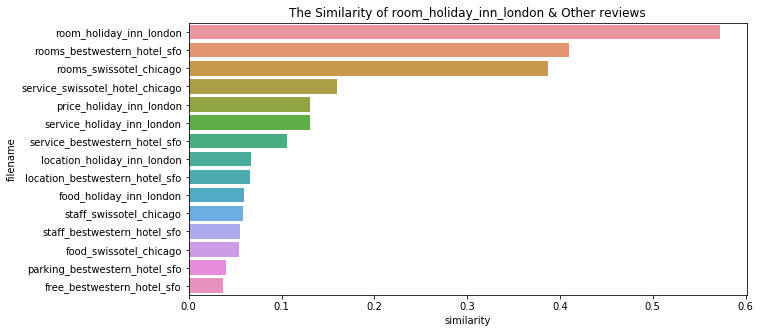

In [10]:
#시각화(x:수치값, y:filename)
plt.figure(figsize=(10,5))
sns.barplot(x= hotel_df['similarity'], y=hotel_df['filename'])
plt.title('The Similarity of '+str(sort_filename[0]) +' & Other reviews')

- 첫번째 문서와 가장 유사도가 높은 문서는 'room_holiday_inn_london' 이다.